### UNDERSTANDING LONG SHORT TERM MEMORY (LSTM)

In [ ]:
#imports

#keras imports
from keras.models import Sequential, Model
from keras.layers import Embedding, SimpleRNN, Flatten, Input, Dense
from keras import layers
from keras.layers import LSTM
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.optimizers import RMSprop


# general imports
from IPython.display import display, Markdown #just to display markdown
import numpy as np
import cv2

# utility functions
import os
import sys
%matplotlib inline
os.path.dirname(os.path.abspath("__file__"))
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from utility.utils import utils
utility_obj = utils()

### TRAINING A MODEL USING LSTM LAYER

starting model training...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 673,089
Trainable params: 673,089
Non-trainable params: 0
_________________________________________________________________


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 170s 8ms/step - loss: 0.4576 - acc: 0.7930 - val_loss: 0.3239 - val_acc: 0.8666
Epoch 2/10
20000/20000 [==============================] - 167s 8ms/step - loss: 0.2799 - acc: 0.8883 - val_loss: 0.3425 - val_acc: 0.8738
Epoch 3/10
20000/20000 [======================

### result

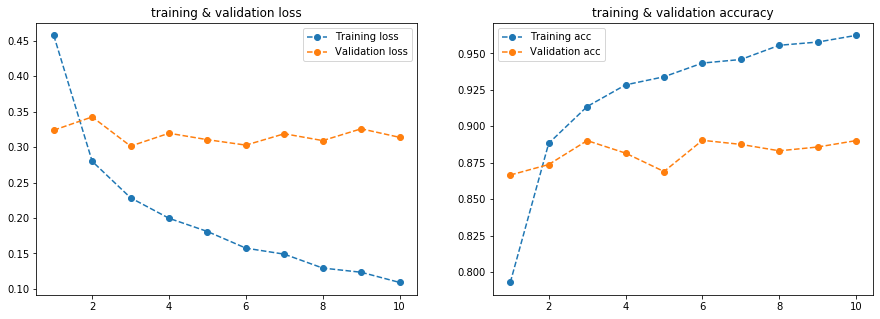

In [8]:
# model architecture and training
print("starting model training...")
model = Sequential()
model.add(Embedding(max_features, 64))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))
model.summary()
print ("\n")

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

### result

In [ ]:
# ploting model training results
utility_obj.plot_training_history(history.history)

### UNDERSTANDING BIDIRECTIONAL RNNs

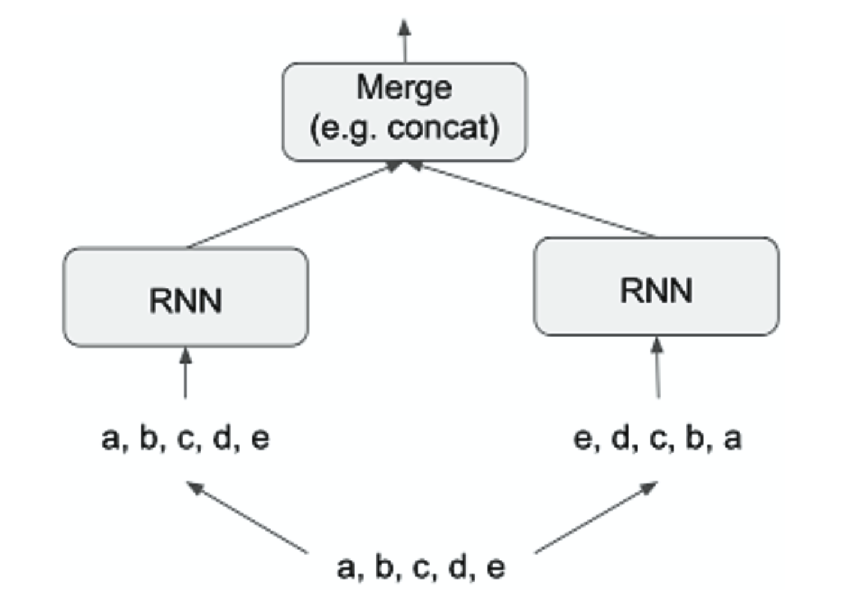

### reversing data for sequential model training


Undertanding the results, if the data is feed in reverse manner. 
Which is the second input in bi-directional RNN layer.

Data reversing
starting model training...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 673,089
Trainable params: 673,089
Non-trainable params: 0
_________________________________________________________________


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 85s 4ms/step - loss: 0.6931 - acc: 0.5052 - val_loss: 0.6933 - val_acc: 0.5034
Epoch 2/10
20000/20000 [=======================

### result

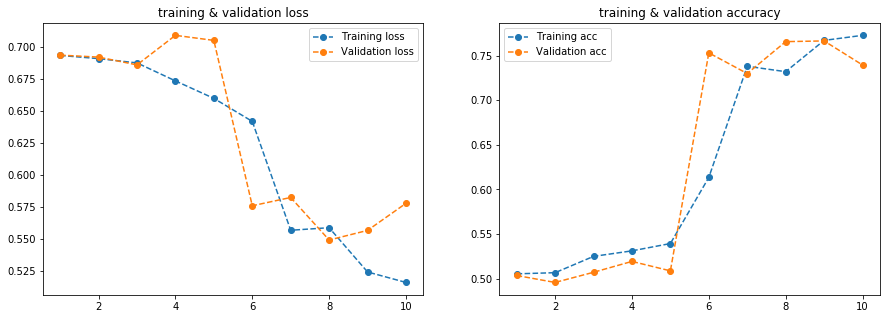


Thus, remarkably, on such a text dataset, reversed-order processing works 
just as well as chronological processing



In [9]:
utility_obj.plot_large_image_without_borders("./pics/bi-directional_rnn.png")
display(Markdown("### reversing data for sequential model training"))

print ("""
Undertanding the results, if the data is feed in reverse manner. 
Which is the second input in bi-directional RNN layer.
""")

print ("Data reversing")
# Reverse sequences
input_train_ = [x[::-1] for x in input_train]
input_test_ = [x[::-1] for x in input_test]

# Pad sequences
x_train_ = sequence.pad_sequences(input_train_, maxlen=maxlen)
x_test_ = sequence.pad_sequences(input_test_, maxlen=maxlen)

# model architecture and training
print("starting model training...")
model = Sequential()
model.add(layers.Embedding(max_features, 64))
model.add(layers.LSTM(64))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
print ("\n")

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train_, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

### result

In [ ]:
# ploting model training results
utility_obj.plot_training_history(history.history)

Thus, remarkably, on such a text dataset, reversed-order processing works 
just as well as chronological processing

### TRAINING AND EVALUATING A BIDIRECTIONAL LSTM

starting model training...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 706,177
Trainable params: 706,177
Non-trainable params: 0
_________________________________________________________________


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 157s 8ms/step - loss: 0.5068 - acc: 0.7586 - val_loss: 0.3894 - val_acc: 0.8356
Epoch 2/10
20000/20000 [==============================] - 156s 8ms/step - loss: 0.3107 - acc: 0.8780 - val_loss: 0.3242 - val_acc: 0.8690
Epoch 3/10
20000/20000 [======================

### result

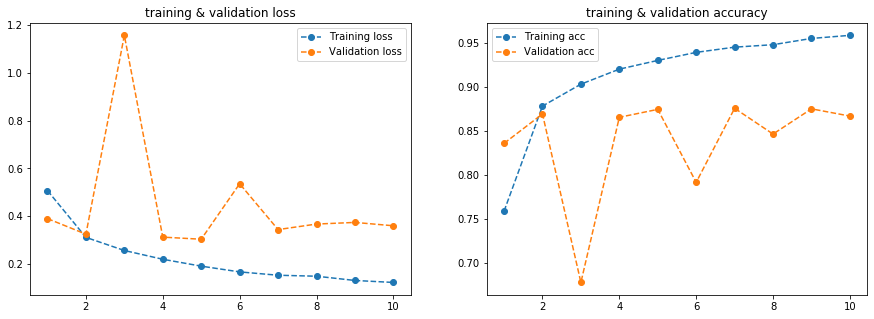


It performs slightly better than the regular LSTM we tried in the previous section, 
going above 89% validation accuracy. It also seems to overfit faster, which is unsurprising 
since a bidirectional layer has twice more parameters than a chronological LSTM.



In [10]:
# model architecture and training
print("starting model training...")
model = Sequential()
model.add(layers.Embedding(max_features, 64))
model.add(layers.Bidirectional(layers.LSTM(64)))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
print ("\n")

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# ploting model training results
display(Markdown("### result"))
utility_obj.plot_training_history(history.history)

### result

In [ ]:
# ploting model training results
utility_obj.plot_training_history(history.history)


It performs slightly better than the regular LSTM we tried in the previous section, 
going above 89% validation accuracy. It also seems to overfit faster, which is unsurprising 
since a bidirectional layer has twice more parameters than a chronological LSTM.


### TRAINING A MODEL USING LSTM LAYER

starting model training...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 673,089
Trainable params: 673,089
Non-trainable params: 0
_________________________________________________________________


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 170s 8ms/step - loss: 0.4576 - acc: 0.7930 - val_loss: 0.3239 - val_acc: 0.8666
Epoch 2/10
20000/20000 [==============================] - 167s 8ms/step - loss: 0.2799 - acc: 0.8883 - val_loss: 0.3425 - val_acc: 0.8738
Epoch 3/10
20000/20000 [======================

### result

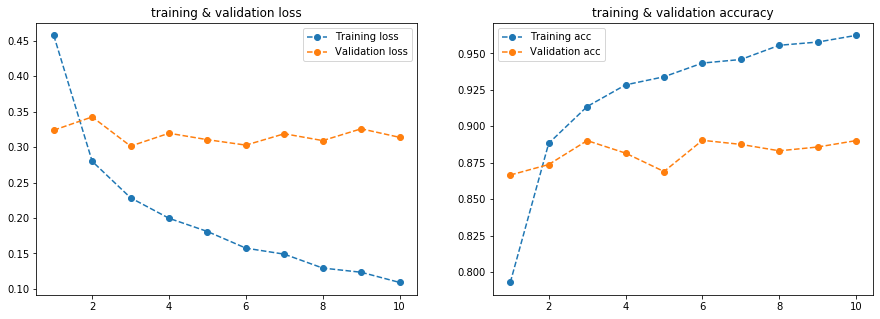

In [8]:
# model architecture and training
print("starting model training...")
model = Sequential()
model.add(Embedding(max_features, 64))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))
model.summary()
print ("\n")

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

### result

In [ ]:
# ploting model training results
utility_obj.plot_training_history(history.history)

### UNDERSTANDING BIDIRECTIONAL RNNs

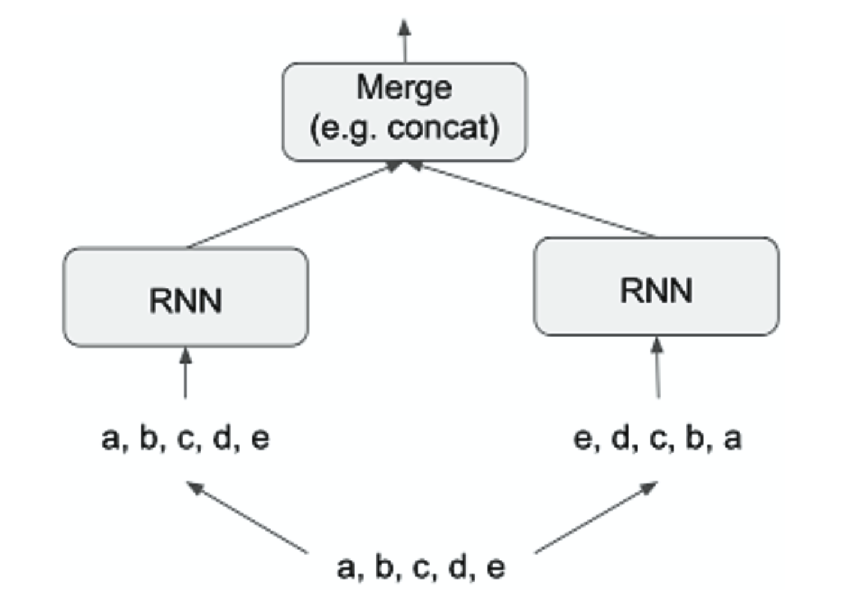

### reversing data for sequential model training


Undertanding the results, if the data is feed in reverse manner. 
Which is the second input in bi-directional RNN layer.

Data reversing
starting model training...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 673,089
Trainable params: 673,089
Non-trainable params: 0
_________________________________________________________________


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 85s 4ms/step - loss: 0.6931 - acc: 0.5052 - val_loss: 0.6933 - val_acc: 0.5034
Epoch 2/10
20000/20000 [=======================

### result

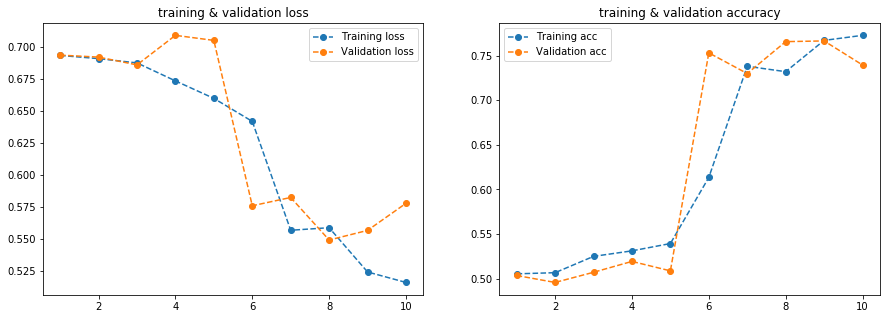


Thus, remarkably, on such a text dataset, reversed-order processing works 
just as well as chronological processing



In [9]:
utility_obj.plot_large_image_without_borders("./pics/bi-directional_rnn.png")
display(Markdown("### reversing data for sequential model training"))

print ("""
Undertanding the results, if the data is feed in reverse manner. 
Which is the second input in bi-directional RNN layer.
""")

print ("Data reversing")
# Reverse sequences
input_train_ = [x[::-1] for x in input_train]
input_test_ = [x[::-1] for x in input_test]

# Pad sequences
x_train_ = sequence.pad_sequences(input_train_, maxlen=maxlen)
x_test_ = sequence.pad_sequences(input_test_, maxlen=maxlen)

# model architecture and training
print("starting model training...")
model = Sequential()
model.add(layers.Embedding(max_features, 64))
model.add(layers.LSTM(64))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
print ("\n")

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train_, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

### result

In [ ]:
# ploting model training results
utility_obj.plot_training_history(history.history)

Thus, remarkably, on such a text dataset, reversed-order processing works 
just as well as chronological processing

### TRAINING AND EVALUATING A BIDIRECTIONAL LSTM

starting model training...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 706,177
Trainable params: 706,177
Non-trainable params: 0
_________________________________________________________________


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 157s 8ms/step - loss: 0.5068 - acc: 0.7586 - val_loss: 0.3894 - val_acc: 0.8356
Epoch 2/10
20000/20000 [==============================] - 156s 8ms/step - loss: 0.3107 - acc: 0.8780 - val_loss: 0.3242 - val_acc: 0.8690
Epoch 3/10
20000/20000 [======================

### result

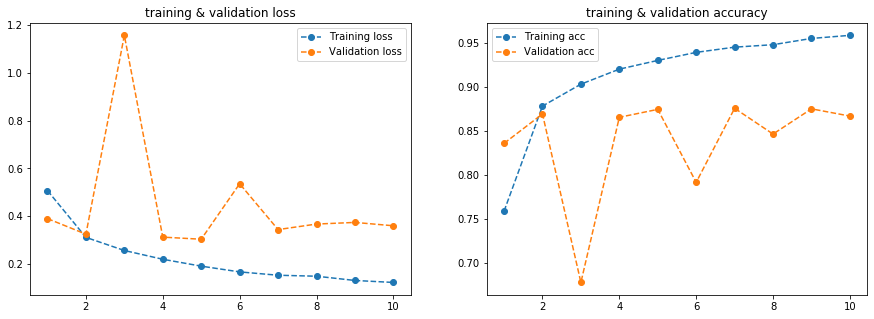


It performs slightly better than the regular LSTM we tried in the previous section, 
going above 89% validation accuracy. It also seems to overfit faster, which is unsurprising 
since a bidirectional layer has twice more parameters than a chronological LSTM.



In [10]:
# model architecture and training
print("starting model training...")
model = Sequential()
model.add(layers.Embedding(max_features, 64))
model.add(layers.Bidirectional(layers.LSTM(64)))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()
print ("\n")

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# ploting model training results
display(Markdown("### result"))
utility_obj.plot_training_history(history.history)

### result

In [ ]:
# ploting model training results
utility_obj.plot_training_history(history.history)


It performs slightly better than the regular LSTM we tried in the previous section, 
going above 89% validation accuracy. It also seems to overfit faster, which is unsurprising 
since a bidirectional layer has twice more parameters than a chronological LSTM.
